# Dataset Preparation

- In this notebook we will download the following datasets.
    - Princeton Segmentation Benchmark
    - ShapeNet Parts
    - COSEG
    - Label Meshes
- Create the train/val/test splits.
- Visualize samples from the datasets.

In [1]:
import os
os.chdir('..')

In [2]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import numpy as np
import trimesh

from util.visualization_utils import * 

1. Princeton Segmentation Benchmark

In [ ]:
print('Downloading ...')
#!wget https://segeval.cs.princeton.edu/public/Download/MeshsegBenchmark-1.0.zip --no-check-certificate -P ./data
print('Extracting ...')
#!unzip -q ./data/MeshsegBenchmark-1.0.zip -d ./data
#!rm ./data/MeshsegBenchmark-1.0.zip
print('Done.')

In [ ]:
# Load one sample and visualize
sample = trimesh.load("./data/MeshsegBenchmark-1.0/data/off/1.off")
visualize_mesh(sample)

In [ ]:
# Sample points from the given mesh to create a pointcloud
res = 20
points, face_indices = trimesh.sample.sample_surface(sample,res**3)
visualize_pointcloud(points)

In [22]:
import matplotlib.pyplot as plt
import json
def plot_dataset_info(info_path):
    with open(info_path) as info_file:
        dataset = json.load(info_file)
        counts,num_parts = [dataset[item]['count'] for item in dataset],[dataset[item]['num_parts'] for item in dataset]
        labels = dataset.keys()
        x = np.arange(len(labels)) 
        width = 0.35
        
        fig, (ax0,ax1) = plt.subplots(1,2,figsize=(18, 6))
        rects1 = ax0.bar(x - width/2, counts, width, label='Counts')
        rects2 = ax1.bar(x + width/2, num_parts, width, label='Num Parts')

        ax0.set_ylabel('Amount')
        ax0.set_title('Count for each class of objects')
        ax0.set_xticks(x)
        ax0.set_xticklabels(labels,rotation=70)
        ax0.legend()
        
        ax1.set_ylabel('Amount')
        ax1.set_title('Num Parts for each class of objects')
        ax1.set_xticks(x)
        ax1.set_xticklabels(labels,rotation=70)
        ax1.legend()

        ax0.bar_label(rects1, padding=3)
        ax1.bar_label(rects2, padding=3)

        fig.tight_layout()

        plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

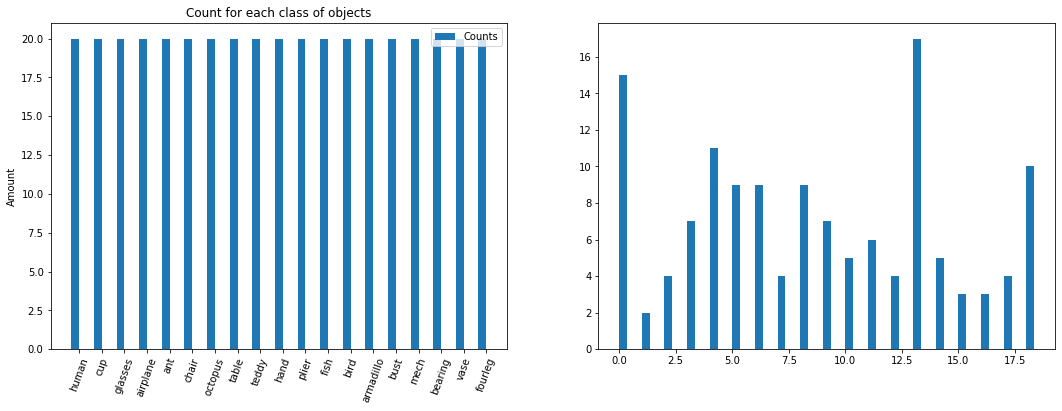

In [23]:
plot_dataset_info('./datasets/meshseg_benchmark/misc/princeton_info.json')

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

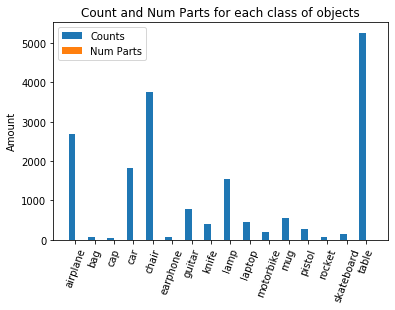

In [13]:
plot_dataset_info('./datasets/shapenet_parts/misc/shapenet_parts_info.json')